        # Updated Excel

In [1]:
# import the relevant packages
from scipy.interpolate import *
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
# Set matplotlib inline
%matplotlib inline
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error


In [2]:
df = pd.read_csv('ESGData.csv',encoding = "ISO-8859-1",index_col= [0,1])
print(df.head(3))

                                    cusip Ticker  Environment   Social   \
Company                    Year                                           
Agilent Technologies, Inc. 2000  00846U10      A             0        1   
                           2001  00846U10      A             0        1   
                           2002  00846U10      A             0        7   

                                 Governance   SumofESG   New SUMofESG  \
Company                    Year                                         
Agilent Technologies, Inc. 2000           -2          5            -1   
                           2001           -2         -4            -1   
                           2002            0          0             7   

                                      P/B       ROA  Leverage      SG&A  \
Company                    Year                                           
Agilent Technologies, Inc. 2000  3.993307  0.197281  0.375074  0.770022   
                           2001  

In [3]:
def winsorize_series(s):
    q = s.quantile([0.05, 0.95])
    if isinstance(q, pd.Series) and len(q) == 2:
        s[s < q.iloc[0]] = q.iloc[0]
        s[s > q.iloc[1]] = q.iloc[1]
    return s

def winsorize_df(df):
    return df.apply(winsorize_series, axis=0)

In [4]:
display(df[0:3])
print(df.shape)

cusip Ticker  Environment   Social   \
Company                    Year                                           
Agilent Technologies, Inc. 2000  00846U10      A             0        1   
                           2001  00846U10      A             0        1   
                           2002  00846U10      A             0        7   

                                 Governance   SumofESG   New SUMofESG  \
Company                    Year                                         
Agilent Technologies, Inc. 2000           -2          5            -1   
                           2001           -2         -4            -1   
                           2002            0          0             7   

                                      P/B       ROA  Leverage      SG&A  \
Company                    Year                                           
Agilent Technologies, Inc. 2000  3.993307  0.197281  0.375074  0.770022   
                           2001  1.814184 -0.065282  0.291385  0.458042   
                           2002  1.387778 -0.141873  0.435938  0.458177   

                                      ROE       R&D     CAPEX  Intangible  \
Company                    Year                                             
Agilent Technologies, Inc. 2000  0.203989  0.231080  0.151359    0.102314   
                           2001 -0.097190  0.160119  0.104570    0.127003   
                           2002 -0.244867  0.146381  0.037691    0.085775   

                                  Revenue  
Company                    Year            
Agilent Technologies, Inc. 2000  1.978876  
                           2001  0.996558  
                           2002  0.752567

(26314, 16)


In [5]:
!pip install linearmodels
from linearmodels import PooledOLS
from linearmodels import PanelOLS
from linearmodels import RandomEffects


In [6]:
df.columns = df.columns.str.strip() #removewhitespaces

In [7]:
df['P/B'].dropna()
df['SumofESG'].dropna()

Company                     Year
Agilent Technologies, Inc.  2000    5
                            2001   -4
                            2002    0
                            2003   -2
                            2004   -1
                                   ..
Sealy Corporation           2007   -3
                            2008   -2
                            2009    1
                            2010   -3
                            2011   -3
Name: SumofESG, Length: 26314, dtype: int64

In [8]:
exog_vars = ['Environment','Social','Governance','Revenue','SG&A','ROA','ROE','R&D','CAPEX','Leverage','Intangible']
exog = sm.add_constant(df[exog_vars])
endog = df['P/B']
#random effects model
model_re = RandomEffects(endog, exog) 
re_res = model_re.fit() 
#print results
print(re_res)

                        RandomEffects Estimation Summary                        
Dep. Variable:                    P/B   R-squared:                        0.1678
Estimator:              RandomEffects   R-squared (Between):             -0.7643
No. Observations:               26314   R-squared (Within):               0.4447
Date:                Thu, Jul 14 2022   R-squared (Overall):             -0.0031
Time:                        00:26:38   Log-likelihood                -1.381e+05
Cov. Estimator:            Unadjusted                                           
                                        F-statistic:                      482.09
Entities:                        5844   P-value                           0.0000
Avg Obs:                       4.5027   Distribution:                F(11,26302)
Min Obs:                       1.0000                                           
Max Obs:                       26.000   F-statistic (robust):             481.67
                            

In [9]:
exog_vars = ['Environment','Social','Governance','Revenue','SG&A','ROA','ROE','R&D','CAPEX','Leverage','Intangible']
exog = sm.add_constant(df[exog_vars])
endog = df['P/B']
#fixed Effects model
model_fe = PanelOLS(endog, exog, entity_effects = True) 
fe_res = model_fe.fit() 
print(fe_res)

                          PanelOLS Estimation Summary                           
Dep. Variable:                    P/B   R-squared:                        0.5506
Estimator:                   PanelOLS   R-squared (Between):             -1.5615
No. Observations:               26314   R-squared (Within):               0.5506
Date:                Thu, Jul 14 2022   R-squared (Overall):             -0.2385
Time:                        00:26:38   Log-likelihood                -1.265e+05
Cov. Estimator:            Unadjusted                                           
                                        F-statistic:                      2278.6
Entities:                        5844   P-value                           0.0000
Avg Obs:                       4.5027   Distribution:                F(11,20459)
Min Obs:                       1.0000                                           
Max Obs:                       26.000   F-statistic (robust):             2278.6
                            

In [10]:
df.rename(columns = {'P/B': 'pricebook','SG&A': 'SGA', 'R&D': 'RD'}, inplace = True)
df.head(1)

,,cusip,Ticker,Environment,Social,Governance,SumofESG,New SUMofESG,pricebook,ROA,Leverage,SGA,ROE,RD,CAPEX,Intangible,Revenue
Company,Year,,,,,,,,,,,,,,,,
"Agilent Technologies, Inc.",2000,00846U10,A,0,1,-2,5,-1,3.993307,0.197281,0.375074,0.770022,0.203989,0.23108,0.151359,0.102314,1.978876


In [22]:
exog_vars = ['Environment','Social','Governance','Revenue','SGA','ROA','ROE','RD','CAPEX','Leverage','Intangible']
exog = sm.add_constant(df[exog_vars])
#fixed Effects model
mod = PanelOLS(df.pricebook, exog, entity_effects=True)
fe_res = mod.fit()
print(fe_res)

                          PanelOLS Estimation Summary                           
Dep. Variable:              pricebook   R-squared:                        0.5506
Estimator:                   PanelOLS   R-squared (Between):             -1.5615
No. Observations:               26314   R-squared (Within):               0.5506
Date:                Thu, Jul 14 2022   R-squared (Overall):             -0.2385
Time:                        00:39:04   Log-likelihood                -1.265e+05
Cov. Estimator:            Unadjusted                                           
                                        F-statistic:                      2278.6
Entities:                        5844   P-value                           0.0000
Avg Obs:                       4.5027   Distribution:                F(11,20459)
Min Obs:                       1.0000                                           
Max Obs:                       26.000   F-statistic (robust):             2278.6
                            

In [20]:
Dependantlist = ['Environment','Social','Governance','Revenue','SGA','ROA','ROE','RD','CAPEX','Leverage','Intangible']

# list of models
models = []

for resp in Dependantlist:
    formula = resp + " ~ Environment + Social + Governance + Revenue + SGA + ROA + ROE + RD + CAPEX + Leverage + Intangible"
    models.append(sm.OLS.from_formula(formula, data = df).fit())

# each element is your model. For example, you can access its params
models[0].params

Intercept     -2.688821e-17
Environment    1.000000e+00
Social        -2.690990e-16
Governance     2.671474e-16
Revenue       -1.951564e-16
SGA            8.881784e-16
ROA           -2.789435e-15
ROE           -5.442695e-17
RD            -2.359224e-16
CAPEX         -9.714451e-16
Leverage       3.686287e-16
Intangible     3.859760e-17
dtype: float64

In [23]:
# outcome
out_start=2
out_end= 101
out_nvar=out_end-out_start+1

out_variable=rep(NA, out_nvar)
out_beta=rep(NA, out_nvar)
out_se = rep(NA, out_nvar)
out_pvalue=rep(NA, out_nvar)

# exposure
exp_start=102
exp_end=203
exp_nvar=exp_end-exp_start+1

exp_variable=rep(NA, exp_nvar)
exp_beta=rep(NA, exp_nvar)
exp_se = rep(NA, out_nvar)
exp_pvalue=rep(NA, exp_nvar)

number=1

NameError: name 'rep' is not defined

<AxesSubplot:>

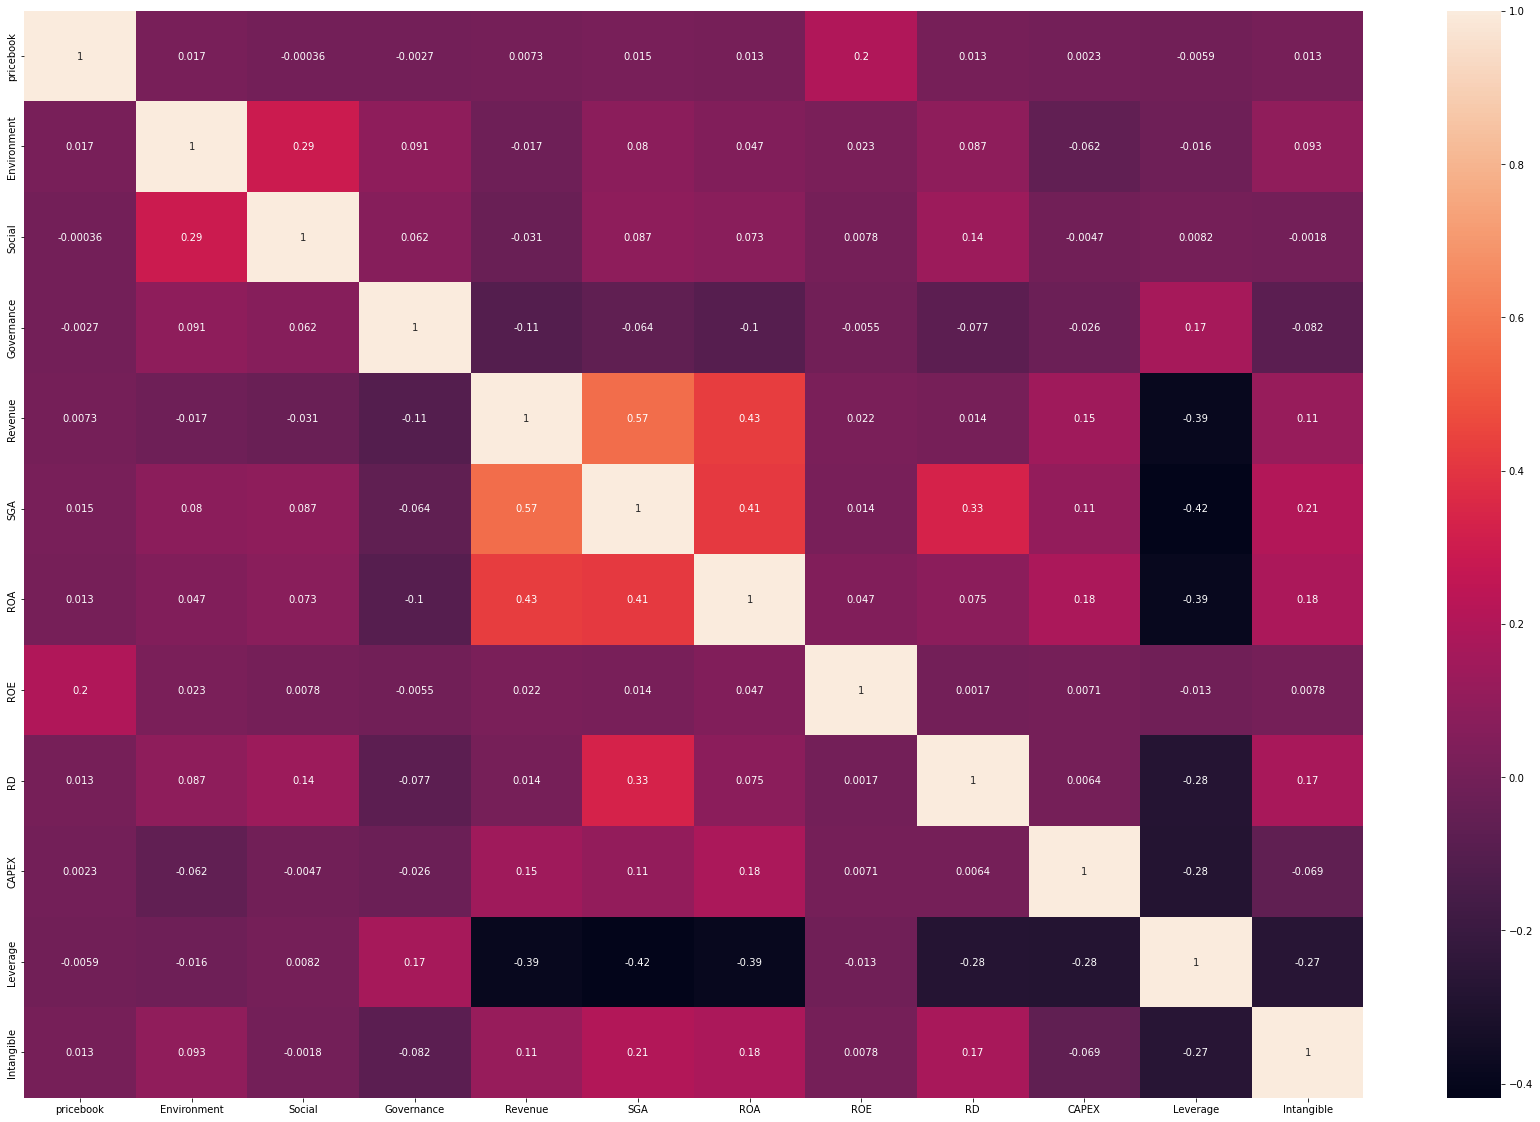

In [25]:
gov_corr = df[['pricebook','Environment','Social','Governance','Revenue','SGA','ROA','ROE','RD','CAPEX','Leverage','Intangible']]

gov_corr_heatmap = gov_corr.corr()


#Plotting of heatmap to determine which variables correlate the most with happiness
f, ax = plt.subplots(figsize=(30, 20)
sns.heatmap(gov_corr_heatmap,xticklabels=gov_corr_heatmap.columns,yticklabels=gov_corr_heatmap.columns, annot=True)

In [29]:
gov_corr_heatmap.head(12)

,pricebook,Environment,Social,Governance,Revenue,SGA,ROA,ROE,RD,CAPEX,Leverage,Intangible
pricebook,1.000000,0.017200,-0.000364,-0.002720,0.007290,0.015005,0.012873,0.200318,0.013443,0.002270,-0.005923,0.012637
Environment,0.017200,1.000000,0.293954,0.091046,-0.016538,0.079571,0.047079,0.022728,0.086887,-0.061582,-0.016425,0.092847
Social,-0.000364,0.293954,1.000000,0.062042,-0.031264,0.087285,0.073240,0.007824,0.135157,-0.004653,0.008180,-0.001838
Governance,-0.002720,0.091046,0.062042,1.000000,-0.106465,-0.064500,-0.100230,-0.005481,-0.076584,-0.025894,0.168039,-0.081591
Revenue,0.007290,-0.016538,-0.031264,-0.106465,1.000000,0.565635,0.427235,0.022373,0.013555,0.146343,-0.389686,0.113756
SGA,0.015005,0.079571,0.087285,-0.064500,0.565635,1.000000,0.414045,0.013869,0.329647,0.107697,-0.418280,0.205365
ROA,0.012873,0.047079,0.073240,-0.100230,0.427235,0.414045,1.000000,0.046730,0.075218,0.183412,-0.387820,0.182236
ROE,0.200318,0.022728,0.007824,-0.005481,0.022373,0.013869,0.046730,1.000000,0.001716,0.007065,-0.013074,0.007835
RD,0.013443,0.086887,0.135157,-0.076584,0.013555,0.329647,0.075218,0.001716,1.000000,0.006447,-0.276764,0.172672
CAPEX,0.002270,-0.061582,-0.004653,-0.025894,0.146343,0.107697,0.183412,0.007065,0.006447,1.000000,-0.284257,-0.068732


NameError: name 'LinearSVR' is not defined

In [14]:
df.describe(include='object')

,cusip,Ticker
count,24927,26314
unique,3825,2974
top,0,X
freq,117,28


In [15]:
df['cusip'].value_counts().to_frame()

,cusip
0,117
67459910,22
48783610,22
17206210,22
12550910,22
...,...
68406010,1
50211720,1
13480110,1
68019410,1
